<a href="https://colab.research.google.com/github/ssook1222/bigdata-analysist-certificate/blob/master/bigdata-analysist-certificate/task3/task3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 카이제곱 검정

### 일원 카이제곱검정
- `chisquare` : 카이제곱 적합도 검정
- 한 개의 요인에 의해 k개의 범주를 가질 때, 이론적 분포를 따르는지 검정
### 이원 카이제곱검정
- `chi2_contingency` 카이제곱 독립 검정
- `fisher_exact` : 빈도수 5개 이하 셀이 20% 이상일 때 사용하는 카이제곱 독립 검정        
모집단이 두개의 변수에 의해 범주화 되었을 때, 두 변수들 사이의 관계가 독립인지 아닌지 검정

---

### Question 1

144회 주사위를 던졌을때, 각 눈금별로 나온 횟수를 나타낸다. 이 데이터가 주사위의 분포에서 나올 가능성이 있는지 검정하라.

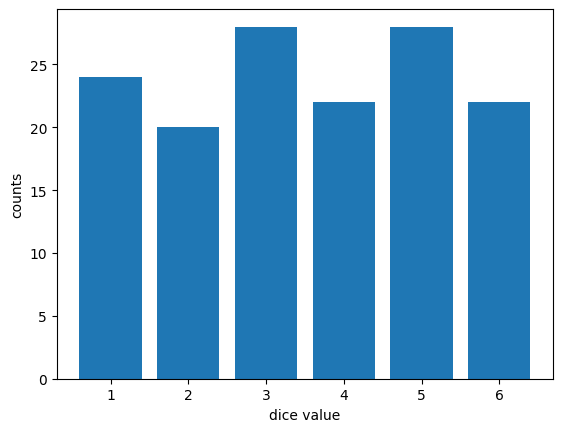

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

plt.bar(df.dice_number,df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

주사위 눈금의 발생확률은 1/6으로 모두 동일하다.    
그러므로 각 눈금의 기댓값은 실제 발생한 모든값을 6으로 나눈 값이다.   

In [3]:
from scipy.stats import chisquare

df['expected'] = (df['counts'].sum()/6).astype('int')

print(chisquare(df.counts,df.expected))

Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)


p-value는 0.8로 귀무가설인 "이 데이터가 주사위의 분포에서 나올 가능성이 있음"을 기각 할 수 없다.   
즉, 해당 데이터는 주사위의 분포에서 나올 수 있다.


---

### Question 2

다음 데이터는 어떤 집단의 왼손잡이, 오른손 잡이의 숫자를 나타낸다.  
인간의 왼손잡이와 오른손잡이의 비율을 0.2:0.8로 알려져있다.
이 집단에서 왼손과 오른손 잡이의 비율이 적합한지 검정하라.   

다시 한 번 풀어보기!

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [40]:
from scipy.stats import chisquare

In [45]:
target = df.hands.value_counts().to_frame()

In [46]:
target['expected'] = [int(target.hands.sum()*0.8),int(target.hands.sum()*0.2)]

In [48]:
print(chisquare(target.hands,target.expected))

Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)


p-value는 0.02로 유의수준 5%이내에서 귀무가설을 기각하고 대립가설을 채택한다.    
즉 주어진 집단의 왼손, 오른손 비율은 0.2, 0.8으로 볼 수 없다.    

---

### Question 3

다음 데이터는 국민 기초 체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정하라.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [58]:
target = pd.crosstab(df['측정회원성별'], df['등급']) #이원카이제곱 검정 시 교차검정을 해야 함

In [51]:
from scipy.stats import chi2_contingency

In [54]:
print(chi2_contingency(target))

Chi2ContingencyResult(statistic=120.06233631119409, pvalue=7.481892813401677e-26, dof=3, expected_freq=array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))


p-value가 0에 근접하므로,      
측정회원성별 - 등급은 연관이 없다는 귀무가설을 기각하고 성별관 체력 등급간에는 관련이 있다 볼 수 있다.

---

### Question 4

성별에 따른 동아리 활동 참석 비율을 나타낸 데이터이다. 성별과 참석 간에 관련이 있는지 검정 하라.

다시 풀어보기!

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [84]:
cdf = df.iloc[:-1,:-1]

In [85]:
from scipy.stats import chi2_contingency, fisher_exact

In [86]:
print(chi2_contingency(cdf))

Chi2ContingencyResult(statistic=3.277575757575758, pvalue=0.07023259819117404, dof=1, expected_freq=array([[1.875, 4.125],
       [3.125, 6.875]]))


카이 제곱 검정시 p-value는 0.07로 귀무가설을 기각하지 못한다.    
성별과 참석여부는 관련이 없다(독립이다).        
하지만 5보다 작은 셀이 20%가 넘어가므로(75%) 피셔의 정확검정을 사용 해야한다.

In [87]:
fisher_exact(cdf)

SignificanceResult(statistic=18.0, pvalue=0.03571428571428571)

피셔의 정확검정시 0.03의 값을 가지므로 귀무가설을 기각한다.     
성별과 참석여부는 관련이 있다.   